# Youtube Stats Pulled Daily

# GadgetIn Daily Youtube Stats Notebook

This notebook updates the GadgetIn Daily Youtube Dataset. It appends with the latest stats and a `pull_date`.

In [16]:
from googleapiclient.discovery import build
import json
import pprint
from IPython.display import JSON
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import config

In [2]:
channel_id = 'UC1dI4tO13ApuSX0QeX8pHng'
channel_ids = [
    'UCOmHUn--16B90oW2L6FRR3A', # Blackpink
    'UC1dI4tO13ApuSX0QeX8pHng', # gadgetin
    'UCVvhlqBpNVoG-DUT3J0oZ-w', # tara arts
    'UCwljrkoI5jsfvAKgW3zNC7Q', # shopee
    'UCAFlBkLMn1dmdYk0kBud4RA', # tokopedia
]

youtube = build('youtube', 'v3', developerKey=config.api_key)


## Get Stats

In [42]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part='snippet, contentDetails, statistics',
        id=','.join(channel_ids))
    
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(
                    channel_name = response['items'][i]['snippet']['title'],
                    subscribers = response['items'][i]['statistics']['subscriberCount'],
                    total_views = response['items'][i]['statistics']['viewCount'],
                    video_count = response['items'][i]['statistics']['videoCount'],
                    playlistId = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                    )
        all_data.append(data)
        
    return pd.DataFrame(all_data)

def get_response_json(youtube, channel_ids):
    request = youtube.channels().list(
        part='snippet, contentDetails, statistics',
        id=','.join(channel_ids))

    response = request.execute()
    
    return JSON(response)
    # return json.dumps(response, indent=4, sort_keys=True)


def get_channel_stats_json(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part='snippet, contentDetails, statistics',
        id=','.join(channel_ids))
    
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(
                    channel_name = response['items'][i]['snippet']['title'],
                    subscribers = response['items'][i]['statistics']['subscriberCount'],
                    total_views = response['items'][i]['statistics']['viewCount'],
                    video_count = response['items'][i]['statistics']['videoCount'],
                    playlistId = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                    )
        all_data.append(data)
        
    return all_data


---

In [44]:
# get stats as json
channel_statistics_json = get_channel_stats_json(youtube, channel_ids)
channel_statistics_json

[{'channel_name': 'GadgetIn',
  'subscribers': '9600000',
  'total_views': '2077478967',
  'video_count': '1250',
  'playlistId': 'UU1dI4tO13ApuSX0QeX8pHng'},
 {'channel_name': 'Tara Arts Game Indonesia',
  'subscribers': '1270000',
  'total_views': '420942995',
  'video_count': '1933',
  'playlistId': 'UUVvhlqBpNVoG-DUT3J0oZ-w'},
 {'channel_name': 'BLACKPINK',
  'subscribers': '76200000',
  'total_views': '24713550998',
  'video_count': '397',
  'playlistId': 'UUOmHUn--16B90oW2L6FRR3A'},
 {'channel_name': 'SHOPEE Indonesia',
  'subscribers': '2430000',
  'total_views': '6499057080',
  'video_count': '3704',
  'playlistId': 'UUwljrkoI5jsfvAKgW3zNC7Q'},
 {'channel_name': 'Tokopedia',
  'subscribers': '2330000',
  'total_views': '1723927158',
  'video_count': '1037',
  'playlistId': 'UUAFlBkLMn1dmdYk0kBud4RA'}]

In [45]:
channel_data_json_to_pd = pd.DataFrame(channel_statistics_json)
channel_data_json_to_pd

,channel_name,subscribers,total_views,video_count,playlistId
0,GadgetIn,9600000,2077478967,1250,UU1dI4tO13ApuSX0QeX8pHng
1,Tara Arts Game Indonesia,1270000,420942995,1933,UUVvhlqBpNVoG-DUT3J0oZ-w
2,BLACKPINK,76200000,24713550998,397,UUOmHUn--16B90oW2L6FRR3A
3,SHOPEE Indonesia,2430000,6499057080,3704,UUwljrkoI5jsfvAKgW3zNC7Q
4,Tokopedia,2330000,1723927158,1037,UUAFlBkLMn1dmdYk0kBud4RA


In [54]:
channel_data_json_to_pd['subscribers'] = pd.to_numeric(channel_data_json_to_pd['subscribers'])
channel_data_json_to_pd['total_views'] = pd.to_numeric(channel_data_json_to_pd['total_views'])
channel_data_json_to_pd['video_count'] = pd.to_numeric(channel_data_json_to_pd['video_count'])
channel_data_json_to_pd.dtypes

channel_name    object
subscribers      int64
total_views      int64
video_count      int64
playlistId      object
dtype: object

---

In [40]:
# get response as a dataframe
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_statistics

,channel_name,subscribers,total_views,video_count,playlistId
0,GadgetIn,9600000,2077478967,1250,UU1dI4tO13ApuSX0QeX8pHng
1,Tara Arts Game Indonesia,1270000,420942995,1933,UUVvhlqBpNVoG-DUT3J0oZ-w
2,SHOPEE Indonesia,2430000,6499057080,3704,UUwljrkoI5jsfvAKgW3zNC7Q
3,Tokopedia,2330000,1723927158,1037,UUAFlBkLMn1dmdYk0kBud4RA
4,BLACKPINK,76200000,24713550998,397,UUOmHUn--16B90oW2L6FRR3A


In [55]:
# change datatypes
channel_statistics['subscribers'] = pd.to_numeric(channel_statistics['subscribers'])
channel_statistics['total_views'] = pd.to_numeric(channel_statistics['total_views'])
channel_statistics['video_count'] = pd.to_numeric(channel_statistics['video_count'])
channel_statistics.dtypes

channel_name    object
subscribers      int64
total_views      int64
video_count      int64
playlistId      object
dtype: object

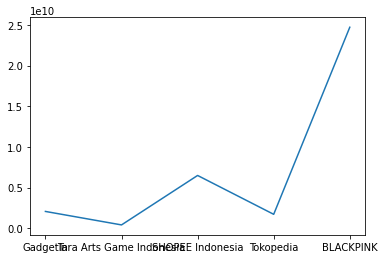

In [56]:
plt.plot(channel_statistics['channel_name'], channel_statistics['total_views']);

In [78]:
# get playlist

def get_playlist():
    playlist_ids = []

    for playlist_id in channel_statistics['playlistId']: 
        request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            playlistId = playlist_id
        )
        response = request.execute()

        playlist_ids.append(playlist_id)
        return playlist_ids
        # revise: need to return pairs of channel_name, playlist_id

def get_video_ids():
        video_ids = []

        request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            playlistId = playlist_id
        )
        response = request.execute()
        for index, video_id in response['items']: 
            video_ids.append(video_id[index]['contentDetails']['videoId'])

        return video_ids
        # revise: return all video_ids for given channel

In [79]:
get_playlist()

['UU1dI4tO13ApuSX0QeX8pHng']